# Data laden en exploratie

Scikit learn heeft een aantal standaard datasets. In dit notebook gaan we naar deze datasets kijken en gebruiken om te leren hoe we de data in een juiste format kunnen krijgen en daarop machine learning kunnen toepassen. Een beroemde en veelgebruikte dataset is de digits dataset, deze bestaat uit plaatjes van 8x8 pixels van handgeschreven cijfers. We zullen de digits dataset tijdens dit notebook en de notebooks die hierop volgen gebruiken.

Voor een overzicht van alle beschikbare voorbeeld datasets kun je hier vinden: https://scikit-learn.org/stable/datasets.html.

## Laden van data
De volgende code laadt de digits dataset in. Op deze manier kun je alle beschikbare voorbeeld datasets inladen. 

We importeren ook numpy en matplotlib, dit is nodig voor data exploratie en visualisatie later in het notebook.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

Het digits object bevat de volgende keys:

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Data exploratie

We kunnen enkele data exploratie technieken toepassen om onze data wat te leren kennen. Let hier bij op dat de '.data' en de '.target'  attributen alleen beschikbaar zijn voor de built-in scikit-learn datasets. Voor datasets die je als een dataframe inleest vanuit bijvoorbeeld een csv bestand kun je numpy/pandas syntax gebruiken om de data te exploreren. 

Het '.data' attribuut bevat de instanties, terwijl het '.target' attribuut de labels bevat. Het '.data' attribuut is een numpy array (n_samples, n_features)

Kijk bijvoorbeeld naar de vorm van de dataset, de range van getallen per feature. Komt dit overeen met je verwachtingen? 

In [3]:
digits.data.shape

(1797, 64)

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [6]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [7]:
print(digits.data.min())
print(digits.data.max())

0.0
16.0


Laten we ook kijken naar de labels:

In [8]:
print(digits.target.shape)
print(digits.target_names)

(1797,)
[0 1 2 3 4 5 6 7 8 9]


Komen de targets ongeveer even vaak voor? Dit kan namelijk van invloed zijn op de performance van een machine learning model. Als een van de targets nauwelijks voorkomt, heeft het model niet genoeg data om over deze target te "leren".

In [9]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

We kunnen onze instanties/features ook visualiseren, de manier waarop je dit doet hangt af van de data. Soms is het handig om een scatterplot of barchart te maken van je data (van instanties of losse features). 

In het voorbeeld hieronder maken we gebruik van een matrix om de handgeschreven cijfers te reconstrueren.

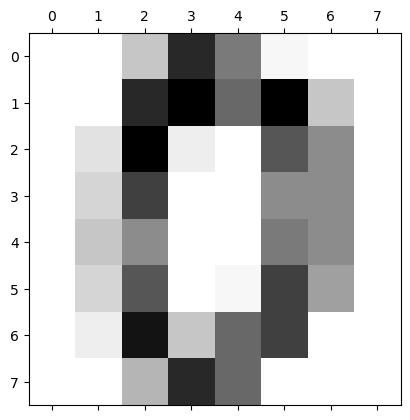

In [10]:
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)
plt.show()

In [11]:
digits.target[0]

0

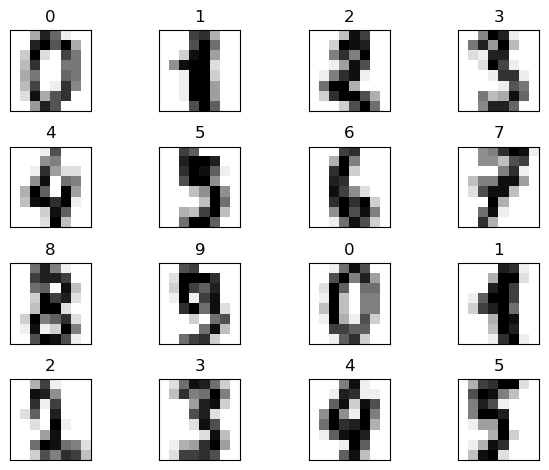

In [12]:
# we kunnen ook meedere instanties plotten met de matplotlib subplot functie
fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()
plt.show()